# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
import pandas as pd
import sqlite3 
conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from src.make_db import create_movies_db

In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [4]:
# rtom = pd.read_sql('''SELECT * 
#                 FROM rotten_tomatoes_movies
#                 ;''', conn)
# rtom.info(10)
#rotten_tomatoes_movies has 17,712 obs in 23 cols

# tn_budgets = pd.read_sql('''SELECT *
#                  FROM tn_movie_budgets
#                  ;''', conn)
# tn_budgets.info()
#tn_budgets has 5,782 obs in 7 columns

In [5]:
# imdb = pd.read_sql('''SELECT *
#                 FROM imdb_title_basics
#                 ;''', conn)
# imdb.info()
#146,144 entries in 7 cols

In [6]:
# bom = pd.read_sql('''SELECT *
#                 FROM bom_movie_gross
#                 ;''', conn)
# bom.info()
#3387 entries in 6 cols

In [7]:
# imdb_title = pd.read_sql('''SELECT *
#                 FROM imdb_title_ratings
#                 ;''', conn)
# imdb_title.info()
#73,856 entries in 4 cols

In [91]:
df = pd.read_sql('''SELECT *
                 FROM tmdb_movies
                 ;''', conn)
df.info()
#tmdb_movies has 26,517 rows in 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### sort the database first to pull out the 100 most popular then analyze genres (code from Dorothy)

#### code to pull movies from 2010-2020 & sort by popularity

In [92]:
#sort for decade from 2010-2020
df = df[(df['release_date'] >= '2010-01-00') & (df['release_date'] <= '2020-01-00')]
df.shape
#sort by popularity
date = df.sort_values(by='popularity',ascending=False).head(100)
date

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...
17389,17389,"[10749, 16, 18]",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161
20633,20633,"[35, 18]",440472,en,The Upside,28.138,2019-01-11,The Upside,7.3,274
20634,20634,"[12, 28, 14, 35]",166426,en,Pirates of the Caribbean: Dead Men Tell No Tales,28.101,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,6.6,6931
14177,14177,"[28, 12, 878]",76341,en,Mad Max: Fury Road,28.099,2015-05-15,Mad Max: Fury Road,7.4,14454


### pull apart genres for tmdb datatable


In [93]:
#rename df to keep code intact
tmdb = date
tmdb.head(10)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [94]:
#using eval to turn an expression into numerics
tmdb.genre_ids = tmdb.genre_ids.apply(eval)

In [95]:
#explode genre ids in sorted table
tmdb_exploded = tmdb.explode('genre_ids')

In [96]:
#verify that it looks right
tmdb_exploded.head(20)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,12,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
23811,23811,28,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
23811,23811,14,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,28,245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
11019,11019,53,245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,28,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
23812,23812,12,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
23812,23812,16,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
23812,23812,878,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
23812,23812,35,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048


In [115]:
#recode genre_ids to categories
#first, make a new column
tmdb_exploded['genre_codes'] = tmdb_exploded['genre_ids']
#then a big set of .loc functions to recode genres

tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 28), 'genre_codes'] = 'Action'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 12), 'genre_codes'] = 'Adventure'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 16), 'genre_codes'] = 'Animation'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 35), 'genre_codes'] = 'Comedy'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 80), 'genre_codes'] = 'Crime'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 99), 'genre_codes'] = 'Documentary'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 18), 'genre_codes'] = 'Drama'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10751), 'genre_codes'] = 'Family'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 14), 'genre_codes'] = 'Fantasy'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 36), 'genre_codes'] = 'History'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 27), 'genre_codes'] = 'Horror'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10402), 'genre_codes'] = 'Music'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 9648), 'genre_codes'] = 'Mystery'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10749), 'genre_codes'] = 'Romance'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 878), 'genre_codes'] = 'Sci-Fi'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10770), 'genre_codes'] = 'TV Movie'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 53), 'genre_codes'] = 'Thriller'
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 10752), 'genre_codes'] = 'War'  
tmdb_exploded.loc[(tmdb_exploded['genre_ids'] == 37), 'genre_codes'] = 'Western'

In [116]:
tmdb_exploded.head(4)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_codes,year
23811,23811,12,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Adventure,2018
23811,23811,28,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Action,2018
23811,23811,14,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Fantasy,2018
11019,11019,28,245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Action,2014


In [117]:
#check the number of movie entries per genre
tmdb_exploded.value_counts('genre_codes')

genre_codes
Action       65
Adventure    60
Sci-Fi       40
Fantasy      35
Drama        24
Thriller     23
Comedy       18
Family       12
Crime         9
Animation     8
Romance       8
Horror        7
Mystery       4
War           4
History       3
Music         3
dtype: int64

### prepare data for plotting - add month & formatting

In [18]:
#feed tmdb_exploded to lambda function to pull year from date string

In [118]:
#pulled month value from date (5th & 6th char) 
tmdb_lambda = tmdb_exploded['release_date'].apply(lambda x: x[0:4])
tmdb_lambda

23811    2018
23811    2018
23811    2018
11019    2014
11019    2014
         ... 
14177    2015
14177    2015
17390    2016
17390    2016
17390    2016
Name: release_date, Length: 323, dtype: object

In [119]:
# creates new column
tmdb_exploded['year'] = tmdb_lambda
tmdb_exploded.head(10)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_codes,year
23811,23811,12,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Adventure,2018
23811,23811,28,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Action,2018
23811,23811,14,299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Fantasy,2018
11019,11019,28,245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Action,2014
11019,11019,53,245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Thriller,2014
23812,23812,28,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,Action,2018
23812,23812,12,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,Adventure,2018
23812,23812,16,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,Animation,2018
23812,23812,878,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,Sci-Fi,2018
23812,23812,35,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,Comedy,2018


In [120]:
#calc average popularity for each month
tmdb_groupby = tmdb_exploded.groupby('year').mean()
tmdb_groupby

,idx,id,popularity,vote_average,vote_count
year,,,,,
2010,1.000000,10851.000000,30.108000,7.430000,9990.800000
2011,2469.600000,11875.800000,32.582500,7.000000,10493.700000
2012,5179.000000,24428.000000,50.289000,7.600000,19673.000000
2013,7882.000000,83901.666667,30.875000,7.166667,12245.666667
2014,11316.925926,166328.259259,36.990685,7.450000,9621.888889
2015,14898.774194,133974.225806,32.142290,6.883871,9687.935484
2016,18167.448276,265644.206897,33.085517,7.082759,11969.655172
2017,21195.940299,268331.089552,37.158448,7.198507,8712.164179
2018,23830.851852,375141.537037,37.465241,6.864815,4139.972222


In [121]:
#reset index from month to a new index
tmdb_groupby.reset_index(inplace=True)
tmdb_groupby

,year,idx,id,popularity,vote_average,vote_count
0,2010,1.000000,10851.000000,30.108000,7.430000,9990.800000
1,2011,2469.600000,11875.800000,32.582500,7.000000,10493.700000
2,2012,5179.000000,24428.000000,50.289000,7.600000,19673.000000
3,2013,7882.000000,83901.666667,30.875000,7.166667,12245.666667
4,2014,11316.925926,166328.259259,36.990685,7.450000,9621.888889
5,2015,14898.774194,133974.225806,32.142290,6.883871,9687.935484
6,2016,18167.448276,265644.206897,33.085517,7.082759,11969.655172
7,2017,21195.940299,268331.089552,37.158448,7.198507,8712.164179
8,2018,23830.851852,375141.537037,37.465241,6.864815,4139.972222
9,2019,20633.000000,440472.000000,28.138000,7.300000,274.000000


### plot popularity of all genres

Text(0.5, 1.0, 'Movie Popularity Throughout the Decade - All Genres')

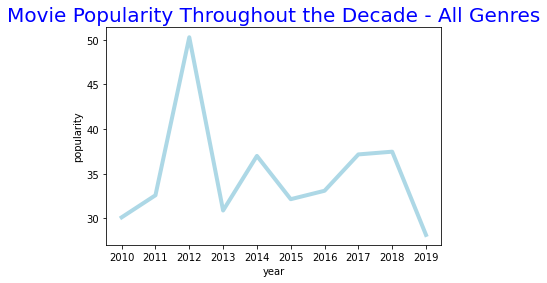

In [122]:
fig, ax = plt.subplots()
ax.plot(tmdb_groupby['year'], tmdb_groupby['popularity'], color='lightblue', linewidth=4, linestyle='-')
ax.set_xlabel('year')
ax.set_ylabel('popularity')
ax.set_title('Movie Popularity Throughout the Decade - All Genres', color='blue', fontsize=20)

In [123]:
#Joel magic here
plot_table = tmdb_exploded.groupby(['genre_codes', 'year']).mean().reset_index().pivot(index='year', columns='genre_codes', values='popularity')
plot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2010 to 2019
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Action     9 non-null      float64
 1   Adventure  9 non-null      float64
 2   Animation  4 non-null      float64
 3   Comedy     7 non-null      float64
 4   Crime      5 non-null      float64
 5   Drama      7 non-null      float64
 6   Family     7 non-null      float64
 7   Fantasy    8 non-null      float64
 8   History    2 non-null      float64
 9   Horror     2 non-null      float64
 10  Music      2 non-null      float64
 11  Mystery    2 non-null      float64
 12  Romance    4 non-null      float64
 13  Sci-Fi     8 non-null      float64
 14  Thriller   4 non-null      float64
 15  War        2 non-null      float64
dtypes: float64(16)
memory usage: 1.3+ KB


<AxesSubplot:xlabel='year'>

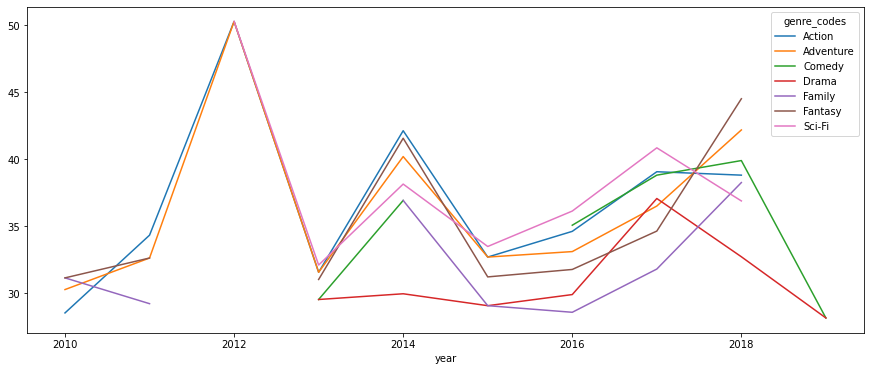

In [128]:
plot_dropped = plot_table.drop(columns=['History', 'Horror', 'Music', 'Mystery', 'War', 'Animation', 'Thriller', 'Romance', 'Crime'])
plot_dropped.plot(figsize = (15,6))

### plot popularity for each genre separately

Text(0.5, 1.0, 'Movie Popularity Throughout the Year - All Genres')

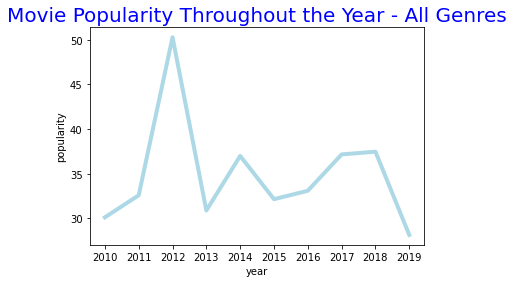

In [106]:
fig, ax = plt.subplots()
ax.plot(tmdb_groupby['year'], tmdb_groupby['popularity'], color='lightblue', linewidth=4, linestyle='-')
ax.set_xlabel('year')
ax.set_ylabel('popularity')
ax.set_title('Movie Popularity Throughout the Year - All Genres', color='blue', fontsize=20)

### MISC section below plot overall distribution of Genres from somewhere???

In [ ]:
#df_genres.describe()
df_genres.plot(kind='hist', bins=50)
ax.set_title("Distribution of Movie Genres")

========================

#### make a plot of the top movie gross 1995-2021
based on data from here: https://m.the-numbers.com/market/

In [ ]:
gross = pd.read_csv('data/tn_top_grossers.csv') 


In [ ]:
gross['Total Box Office'] = gross['Total Box Office'].str.replace(',', '')
gross['Total Box Office'] = gross['Total Box Office'].str.replace('$', '')
gross[['Total Box Office']] = gross[['Total Box Office']].apply(pd.to_numeric) 
gross.info()

In [ ]:
gross_plot = sns.barplot(data=gross, y="Genre", x="Total Box Office")
gross_plot.set(xlabel = "Total Gross (Billions USD)", ylabel='Movie Genre', title='Top-Grossing Production Methods 1995 to 2021')
gross_plot;